In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../../src/')
from plothelpers import *
from LateralInhibitionNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib



# Preprocess

In [2]:
# Load data
values, cols = [], []
for d_inh in [0] + [4**i for i in range(-4,3)]:
    res = load_LING_simulation('../../results/LING02/', f'LING02-dinh-{d_inh}')
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        values.append(res[quantity].mean(axis=0))
        values.append(res[quantity].std(axis=0))
        cols.append([d_inh, quantity, 'mean'])
        cols.append([d_inh, quantity, 'std'])

# Pd dataframe
df = pd.DataFrame(array(values).T)
df.columns = pd.MultiIndex.from_tuples(cols)
df.to_csv('LING02-plotdata.csv')

# Plot

In [2]:
# Read all data
data = pd.read_csv('LING02-plotdata.csv', header=[0,1,2], index_col=0)
params = json.load(open('LING02-params.json', 'r'))

# Fix columns
cols = []
for d_inh in [0] + [4**i for i in range(-4,3)]:
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        cols.append([d_inh, quantity, 'mean'])
        cols.append([d_inh, quantity, 'std'])
data.columns = pd.MultiIndex.from_tuples(cols)

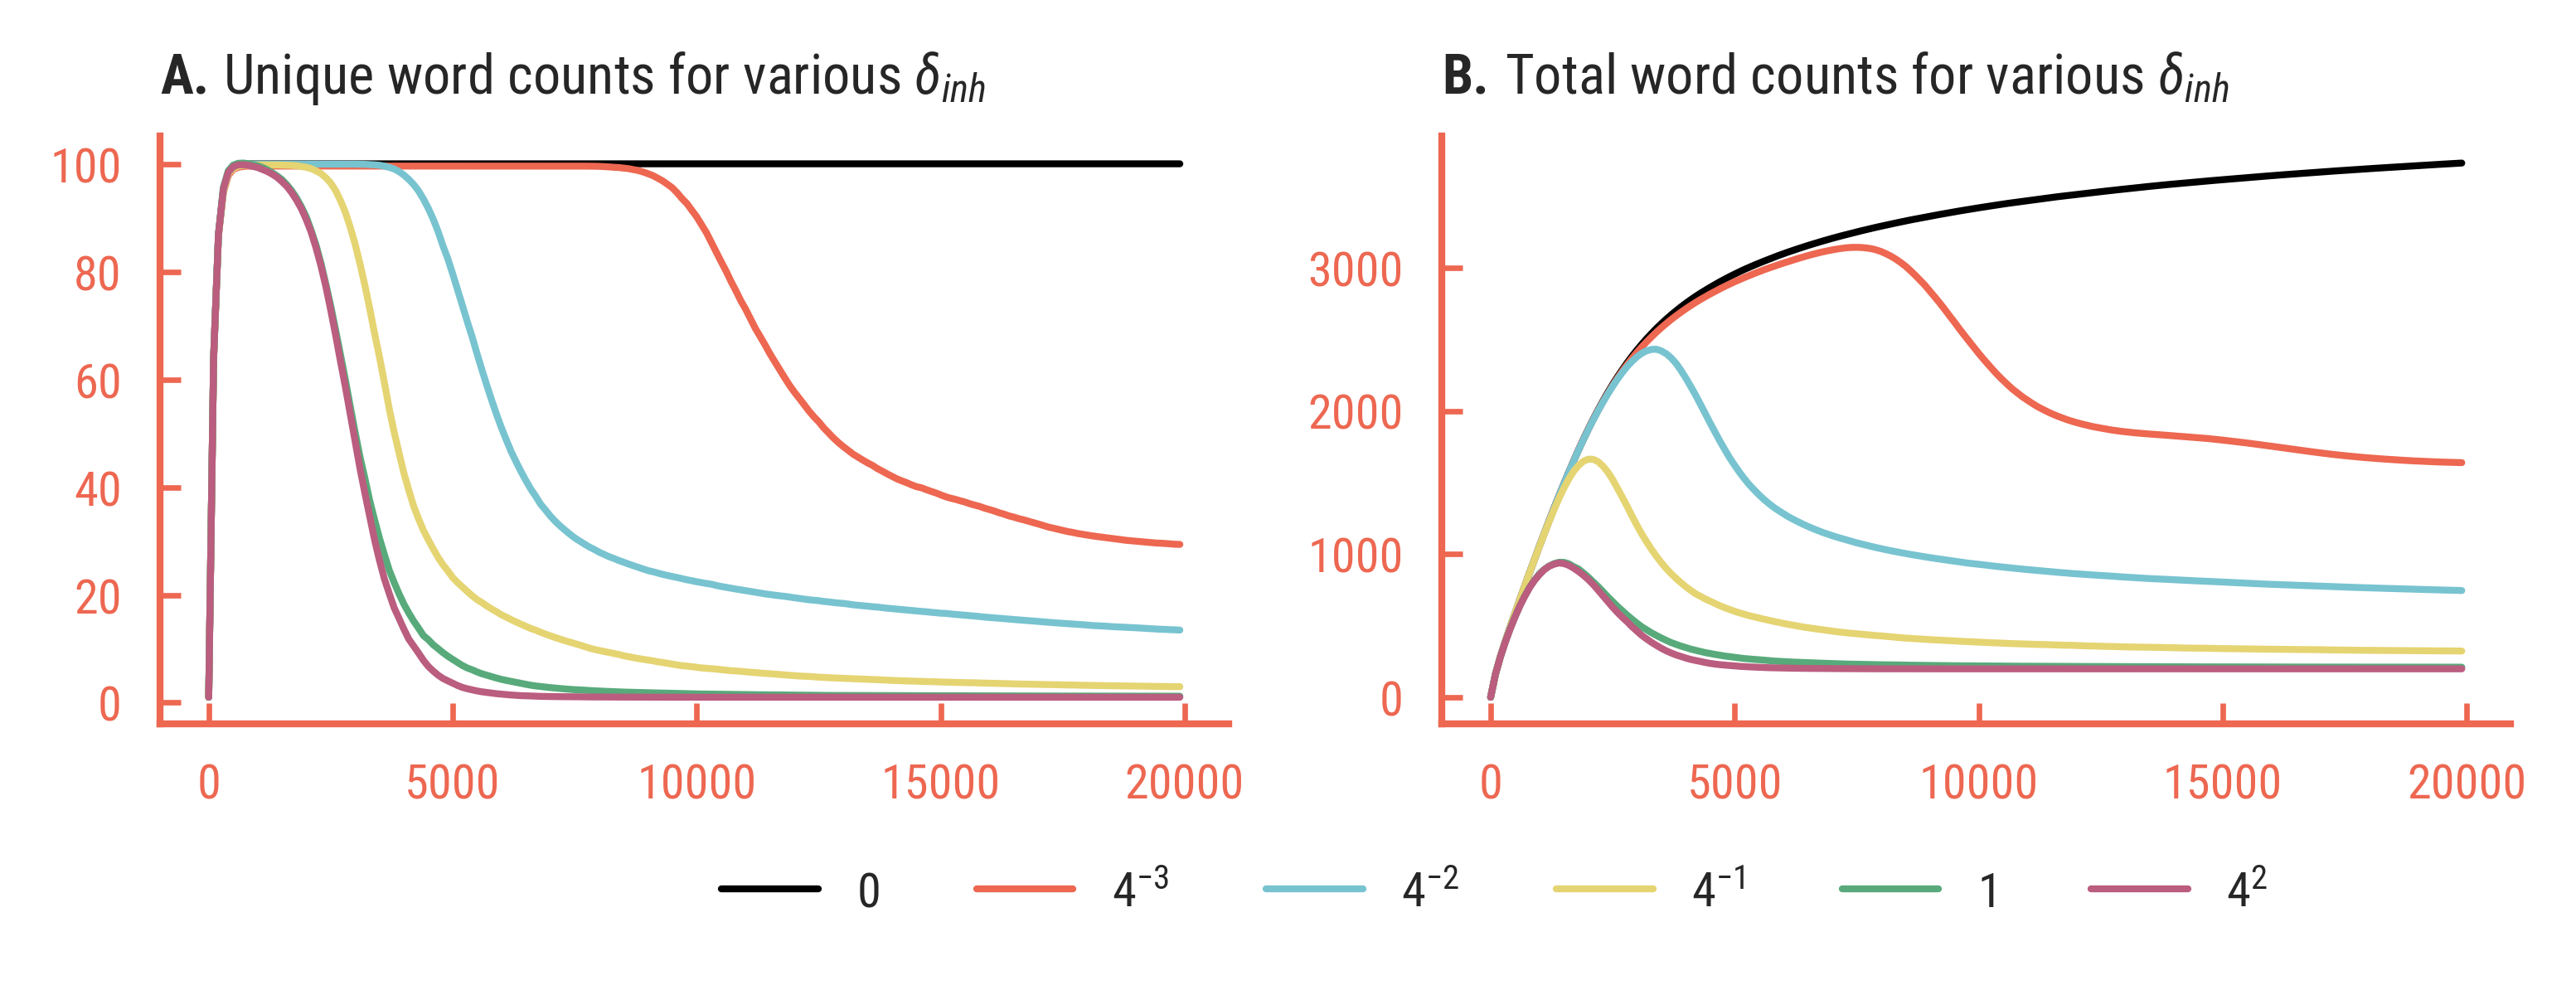

In [3]:
# plot
figure(figsize=cm2inch(12,3))
xs = arange(0, params['T'], params['res'])
d_inhs = [0] + [4**i for i in range(-3,1)] + [16]

def get_label(d_inh):
    if d_inh == 1:
        label = '$1$'
    elif d_inh > 0:
        k = int(log(d_inh)/log(4))
        label = '$4^{'+str(k)+'}$'
    else: 
        label = '$0$'
    return label

ax1 = subplot(121)
for d_inh in d_inhs:
    res = data[d_inh]
    mean = res['num_unique_words']['mean']
    plot(xs, mean, label=get_label(d_inh))#, dashes=dashes[strategy])
title('Unique word counts for various $\delta_{inh}$')
legend(ncol=6, bbox_to_anchor=(2,-.2))

ax2 = subplot(122)
for d_inh in d_inhs:
    res = data[d_inh]
    mean = res['num_words']['mean']
    std = res['num_words']['mean']
    plot(xs, mean, label=get_label(d_inh))
    
title('Total word counts for various $\delta_{inh}$')

restyle_title(ax1, ax2)
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)

savefig('LING02-results.pdf', bbox_inches='tight')